In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string

In [2]:
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### Data Info

In [3]:
df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

### Item Categories

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


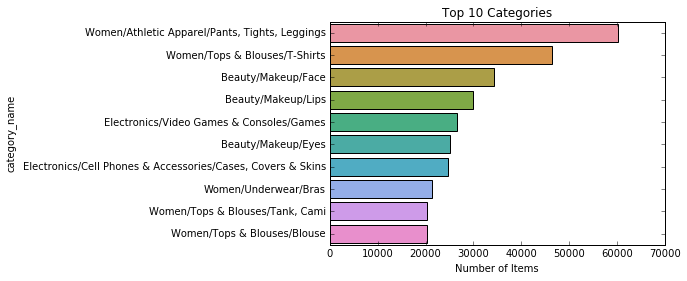

In [6]:
sns.countplot(y = df.category_name, order = df.category_name.value_counts().iloc[:10].index)
plt.title('Top 10 Categories')
plt.xlabel('Number of Items')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


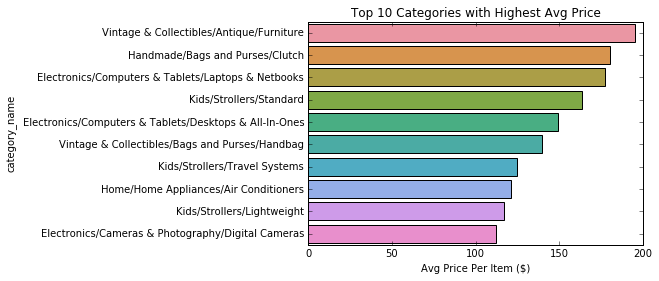

In [7]:
high_avg_price = pd.DataFrame(df.groupby('category_name')['price'].mean()).sort_values('price',ascending=0).head(10)
sns.barplot(x='price',y=high_avg_price.index,data=high_avg_price)
plt.title('Top 10 Categories with Highest Avg Price')
plt.xlabel('Avg Price Per Item ($)')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


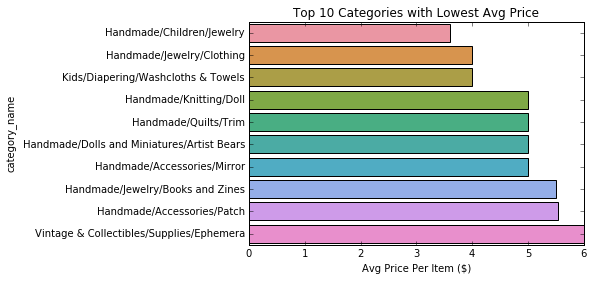

In [8]:
low_avg_price = pd.DataFrame(df.groupby('category_name')['price'].mean()).sort_values('price',ascending=1).head(10)
sns.barplot(x='price',y=low_avg_price.index,data=low_avg_price)
plt.title('Top 10 Categories with Lowest Avg Price')
plt.xlabel('Avg Price Per Item ($)')

In [9]:
def split_cat(text):
    try: return text.split('/')
    except: return (np.nan, np.nan, np.nan)
    
df['category_1'], df['category_2'], df['category_3'] = zip(*df['category_name'].apply(lambda x: split_cat(x)))
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [10]:
print('category 1 unique values:',len(df.category_1.unique()))
print('category 2 unique values:',len(df.category_2.unique()))
print('category 3 unique values:',len(df.category_3.unique()))

category 1 unique values: 11
category 2 unique values: 114
category 3 unique values: 871


//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


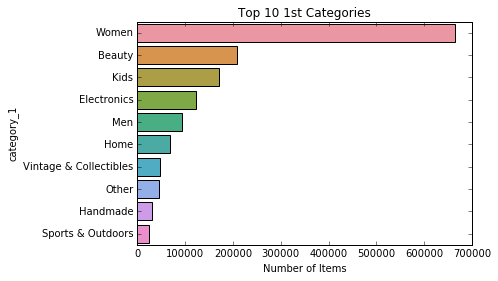

In [11]:
sns.countplot(y = df.category_1, order = df.category_1.value_counts().iloc[:10].index)
plt.title('Top 10 1st Categories')
plt.xlabel('Number of Items')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


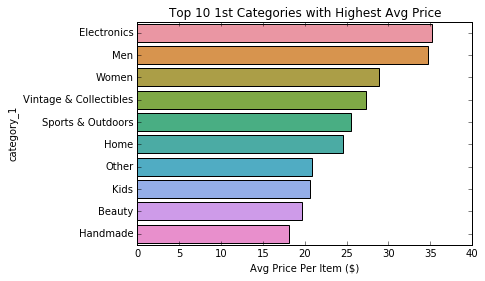

In [12]:
high_avg_price_1 = pd.DataFrame(df.groupby('category_1')['price'].mean()).sort_values('price',ascending=0).head(10)
sns.barplot(x='price',y=high_avg_price_1.index,data=high_avg_price_1)
plt.title('Top 10 1st Categories with Highest Avg Price')
plt.xlabel('Avg Price Per Item ($)')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


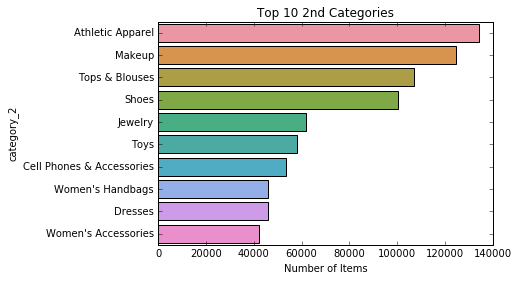

In [13]:
sns.countplot(y = df.category_2, order = df.category_2.value_counts().iloc[:10].index)
plt.title('Top 10 2nd Categories')
plt.xlabel('Number of Items')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


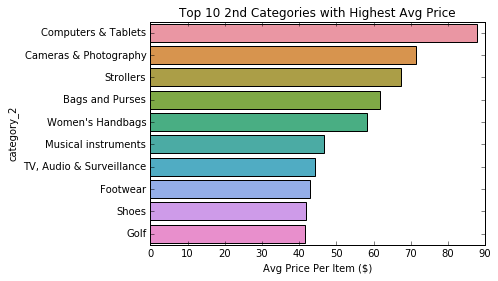

In [14]:
high_avg_price_2 = pd.DataFrame(df.groupby('category_2')['price'].mean()).sort_values('price',ascending=0).head(10)
sns.barplot(x='price',y=high_avg_price_2.index,data=high_avg_price_2)
plt.title('Top 10 2nd Categories with Highest Avg Price')
plt.xlabel('Avg Price Per Item ($)')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


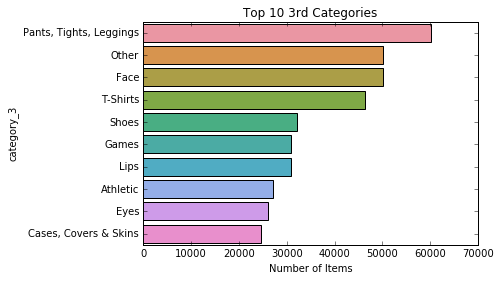

In [15]:
sns.countplot(y = df.category_3, order = df.category_3.value_counts().iloc[:10].index)
plt.title('Top 10 3rd Categories')
plt.xlabel('Number of Items')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


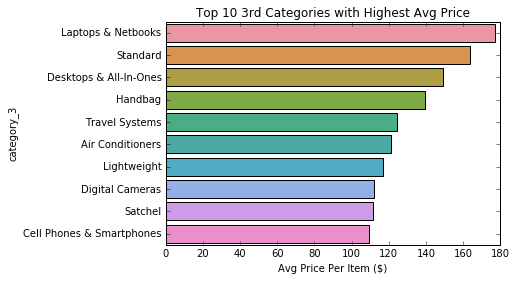

In [16]:
high_avg_price_3 = pd.DataFrame(df.groupby('category_3')['price'].mean()).sort_values('price',ascending=0).head(10)
sns.barplot(x='price',y=high_avg_price_3.index,data=high_avg_price_3)
plt.title('Top 10 3rd Categories with Highest Avg Price')
plt.xlabel('Avg Price Per Item ($)')

### Item Conditions

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


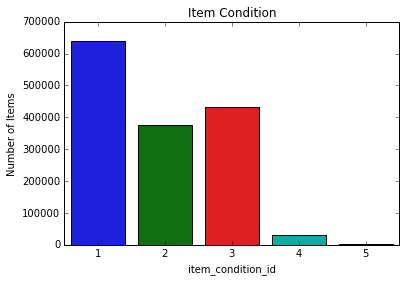

In [17]:
sns.countplot(df.item_condition_id)
plt.title('Item Condition')
plt.ylabel('Number of Items')

### Shipping

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x1a5a2c1da0>,
 <a list of 2 Text xticklabel objects>)

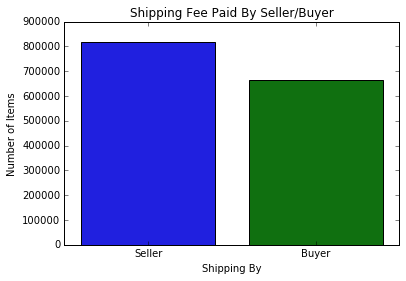

In [18]:
sns.countplot(df.shipping)
plt.title('Shipping Fee Paid By Seller/Buyer')
plt.ylabel('Number of Items')
plt.xlabel('Shipping By')
plt.xticks([0,1],['Seller','Buyer'])

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x1a5a1963c8>,
 <a list of 2 Text xticklabel objects>)

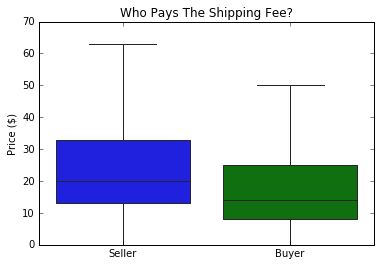

In [19]:
sns.boxplot(x=df.shipping, y = df.price, showfliers=False)
plt.title('Who Pays The Shipping Fee?')
plt.ylabel('Price ($)')
plt.xlabel('')
plt.xticks([0,1],['Seller','Buyer'])

### Price

In [20]:
df.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

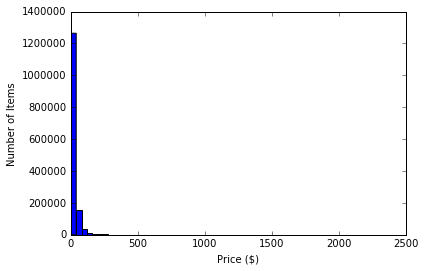

In [21]:
_ = plt.hist(df.price,bins=50)
plt.ylabel('Number of Items')
plt.xlabel('Price ($)')

In [22]:
print('99th percentile:', np.percentile(df.price,99))
print('number of $0 item:',(df.price==0).sum())

99th percentile: 170.0
number of $0 item: 874


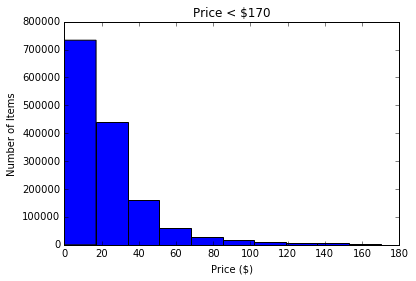

In [23]:
plt.hist(df[df.price<=170].price)
plt.ylabel('Number of Items')
plt.xlabel('Price ($)')
plt.title('Price < $170')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


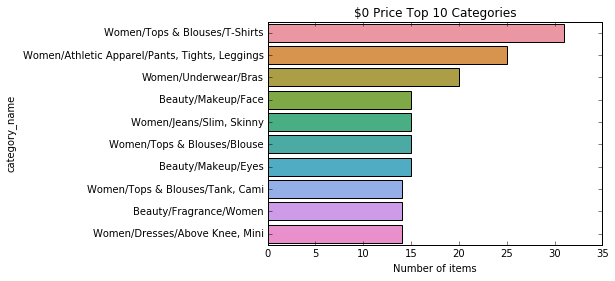

In [24]:
sns.countplot(y = df[df.price==0].category_name, order = df[df.price==0].category_name.value_counts().iloc[:10].index)
plt.title('$0 Price Top 10 Categories')
plt.xlabel('Number of items')

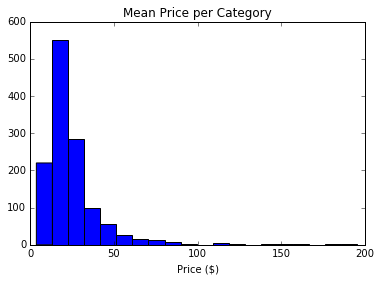

In [25]:
mean_price_category = pd.DataFrame(df.groupby('category_name').price.mean())
plt.hist(mean_price_category.price,bins=20)
plt.title('Mean Price per Category')
plt.xlabel('Price ($)')

### Item Description

count    1.482531e+06
mean     1.457118e+02
std      1.744465e+02
min      1.000000e+00
25%      4.000000e+01
50%      8.600000e+01
75%      1.740000e+02
max      1.046000e+03
Name: item_description, dtype: float64


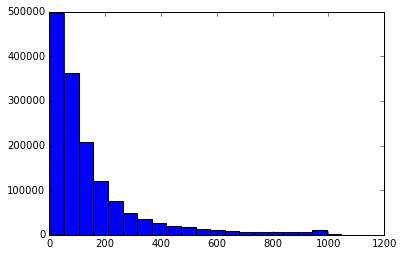

In [26]:
item_desc_length = df.item_description.str.len()
print(item_desc_length.describe())
_ = plt.hist(item_desc_length.dropna(),bins=20)

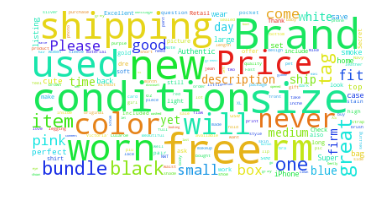

In [27]:
wc = WordCloud(background_color='white', stopwords=STOPWORDS, max_font_size= 50)
wc.generate(' '.join(str(s) for s in df.item_description.values))
plt.axis('off')
plt.imshow(wc)

In [28]:
#add bigram

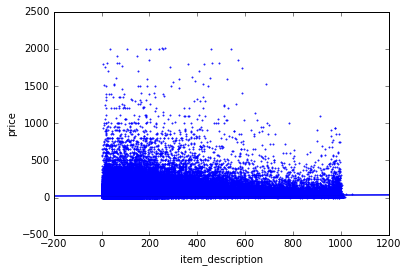

In [29]:
sns.regplot(x=item_desc_length,y='price',data=df,scatter_kws={'s':2})

In [30]:
np.corrcoef(df[['item_description','price']].dropna()['item_description'].str.len(),df[['item_description','price']].dropna()['price'])

array([[ 1.        ,  0.04804841],
       [ 0.04804841,  1.        ]])

### Brands

In [31]:
len(df.brand_name.unique())

4810

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


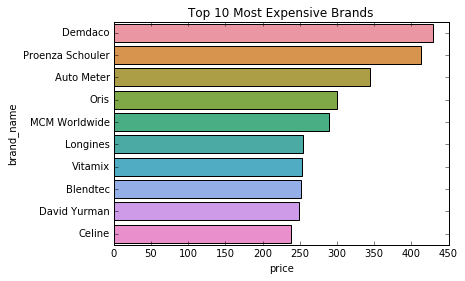

In [32]:
most_expensive_brands = pd.DataFrame(df.groupby('brand_name').price.mean()).sort_values('price',ascending=0).head(10)
sns.barplot(x='price',y=most_expensive_brands.index,data=most_expensive_brands)
plt.title('Top 10 Most Expensive Brands')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


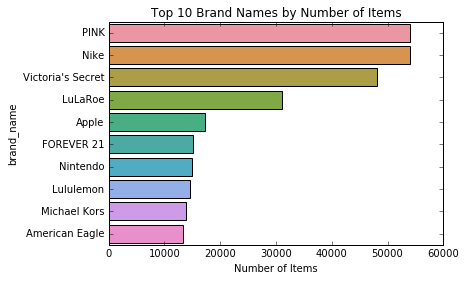

In [33]:
sns.countplot(y = df.brand_name, order = df.brand_name.value_counts().iloc[:10].index)
plt.title('Top 10 Brand Names by Number of Items')
plt.xlabel('Number of Items')

### Feature Engineering

In [35]:
df['brand_yesno'] = df['brand_name'].apply(lambda x: not pd.isnull(x))
df['category_yesno'] = df['category_name'].apply(lambda x: not pd.isnull(x))
df['item_description'] = df['item_description'].fillna('No description yet')
df['item_desc_yesno'] = df['item_description'].apply(lambda x: x!='No description yet')
df['item_desc_len'] = df['item_description'].apply(lambda x: len(x))

In [37]:
def calc_tfidf(desc):
    desc = str(desc)
    desc.translate(string.punctuation)
    tfidfsum=0
    wordscount=0
    for w in desc.lower().split():
        wordscount += 1
        if w in tfidf_dict:
            tfidfsum += tfidf_dict[w]
    
    if wordscount > 0:
        return tfidfsum/wordscount
    else:
        return 0

tfidf = TfidfVectorizer(
    min_df=5, strip_accents='unicode', lowercase =True,
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words='english')
tfidf.fit_transform(df['item_description'].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
df['tfidf'] = df['item_description'].apply(calc_tfidf)

In [38]:
df.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3,brand_yesno,category_yesno,item_desc_yesno,item_desc_len,tfidf
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,False,True,False,18,1.260701
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,True,True,True,188,2.359801


In [ ]:
df['max_price_category'] = pd.DataFrame(df.groupby('category_name').max()['price'])
df['min_price_category'] = pd.DataFrame(df.groupby('category_name').min()['price'])
df['ave_price_category'] = pd.DataFrame(df.groupby('category_name').mean()['price'])
df['median_price_category'] = pd.DataFrame(df.groupby('category_name').median()['price'])

df['max_price_category_1'] = pd.DataFrame(df.groupby('category_1').max()['price'])
df['min_price_category_1'] = pd.DataFrame(df.groupby('category_1').min()['price'])
df['ave_price_category_1'] = pd.DataFrame(df.groupby('category_1').mean()['price'])
df['median_price_category_1'] = pd.DataFrame(df.groupby('category_1').median()['price'])

df['max_price_category_2'] = pd.DataFrame(df.groupby('category_2').max()['price'])
df['min_price_category_2'] = pd.DataFrame(df.groupby('category_2').min()['price'])
df['ave_price_category_2'] = pd.DataFrame(df.groupby('category_2').mean()['price'])
df['median_price_category_2'] = pd.DataFrame(df.groupby('category_2').median()['price'])

df['max_price_category_3'] = pd.DataFrame(df.groupby('category_3').max()['price'])
df['min_price_category_3'] = pd.DataFrame(df.groupby('category_3').min()['price'])
df['ave_price_category_3'] = pd.DataFrame(df.groupby('category_3').mean()['price'])
df['median_price_category_3'] = pd.DataFrame(df.groupby('category_3').median()['price'])

In [ ]:
df['max_price_category_cond'] = pd.DataFrame(df.groupby(['category_name','item_condition_id']).max()['price'])
df['min_price_category_cond'] = pd.DataFrame(df.groupby(['category_name','item_condition_id']).min()['price'])
df['ave_price_category_cond'] = pd.DataFrame(df.groupby(['category_name','item_condition_id']).mean()['price'])
df['median_price_category_cond'] = pd.DataFrame(df.groupby(['category_name','item_condition_id']).median()['price'])

df['max_price_category_1_cond'] = pd.DataFrame(df.groupby(['category_1','item_condition_id']).max()['price'])
df['min_price_category_1_cond'] = pd.DataFrame(df.groupby(['category_1','item_condition_id']).min()['price'])
df['ave_price_category_1_cond'] = pd.DataFrame(df.groupby(['category_1','item_condition_id']).mean()['price'])
df['median_price_category_1_cond'] = pd.DataFrame(df.groupby(['category_1','item_condition_id']).median()['price'])

df['max_price_category_2_cond'] = pd.DataFrame(df.groupby(['category_2','item_condition_id']).max()['price'])
df['min_price_category_2_cond'] = pd.DataFrame(df.groupby(['category_2','item_condition_id']).min()['price'])
df['ave_price_category_2_cond'] = pd.DataFrame(df.groupby(['category_2','item_condition_id']).mean()['price'])
df['median_price_category_2_cond'] = pd.DataFrame(df.groupby(['category_2','item_condition_id']).median()['price'])

df['max_price_category_3_cond'] = pd.DataFrame(df.groupby(['category_3','item_condition_id']).max()['price'])
df['min_price_category_3_cond'] = pd.DataFrame(df.groupby(['category_3','item_condition_id']).min()['price'])
df['ave_price_category_3_cond'] = pd.DataFrame(df.groupby(['category_3','item_condition_id']).mean()['price'])
df['median_price_category_3_cond'] = pd.DataFrame(df.groupby(['category_3','item_condition_id']).median()['price'])

In [ ]:
df['max_price_category_brand'] = pd.DataFrame(df.groupby(['category_name','brand_name']).max()['price'])
df['min_price_category_brand'] = pd.DataFrame(df.groupby(['category_name','brand_name']).min()['price'])
df['ave_price_category_brand'] = pd.DataFrame(df.groupby(['category_name','brand_name']).mean()['price'])
df['median_price_category_brand'] = pd.DataFrame(df.groupby(['category_name','brand_name']).median()['price'])

df['max_price_brand'] = pd.DataFrame(df.groupby('brand_name').max()['price'])
df['min_price_brand'] = pd.DataFrame(df.groupby('brand_name').min()['price'])
df['ave_price_brand'] = pd.DataFrame(df.groupby('brand_name').mean()['price'])
df['median_price_brand'] = pd.DataFrame(df.groupby('brand_name').median()['price'])

In [42]:
ordered_brands_price = pd.DataFrame(df.groupby('brand_name').price.mean()).sort_values('price',ascending=0).index
ordered_brands_count = pd.DataFrame(df.groupby('brand_name').brand_name.count()).sort_values('brand_name',ascending=0).index
df['brand_name_price'] = df['brand_name'].astype('category',ordered=True,categories=ordered_brands_price).cat.codes
df['brand_name_count'] = df['brand_name'].astype('category',ordered=True,categories=ordered_brands_count).cat.codes

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [ ]:
df.head()

### Train Test Split 

### Model